# Support Vector Regression (SVR)

## Importing the libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [33]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[: , 1:-1].values
y = dataset.iloc[: , -1].values

In [34]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [36]:
y = y.reshape(len(y),1)

In [37]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)



> You need to use different StandardScalers for X and y to avoid data leakage and get proper correct output



In [39]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [40]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [43]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X ,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [46]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

regressor.predict(sc_X.transform([[6.5]])) returns a 1D array with the predictions.

sc_y.inverse_transform expects a 2D array, where each row is a separate sample, and each column represents a feature. Even if there's only one feature, it needs to be in a 2D shape (n_samples, 1)

## Visualising the SVR results

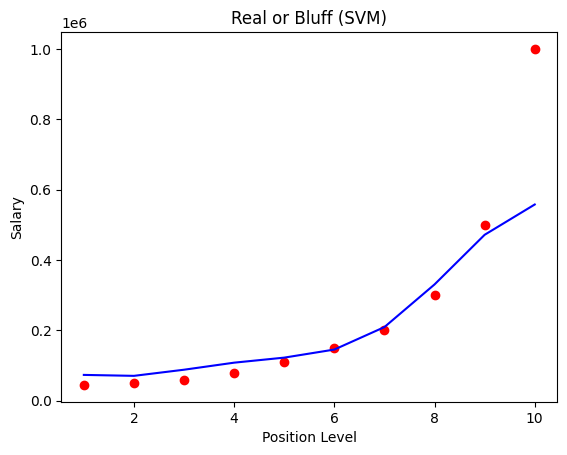

In [50]:
plt.scatter(sc_X.inverse_transform(X) , sc_y.inverse_transform(y) , color = 'red')
plt.plot(sc_X.inverse_transform(X) , sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)) , color = 'blue')
plt.title('Real or Bluff (SVM)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()